In [26]:
import os
import glob
import json
import tqdm
import cv2
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
cwd = os.getcwd()
result_dir = os.path.join(cwd, "result")
down_dir = os.path.join(cwd, "downloads")

info_dir = os.path.join(result_dir, "video_url")
repr_dir = os.path.join(result_dir, "represent")
anlz_dir = os.path.join(result_dir, "analyzed")
sort_dir = os.path.join(result_dir, "sorted")

In [3]:
video_list = glob.glob(os.path.join(down_dir, '*.mp4'))

In [4]:
sorted_list = glob.glob(os.path.join(sort_dir, "*", "*.jpg"))

In [5]:
image_names = [os.path.basename(img).split(".")[0] for img in sorted_list]

In [6]:
print(len(image_names))
print(image_names)

4919
['11210764_02', '11211063_02', '11211362_01', '11211661_02', '11212558_01', '1123887_01', '1125083_01', '112598_01', '1126877_02', '1128073_02', '112897_01', '11613156_02', '1162990_01', '116299_01', '1164485_02', '1169269_02', '350_02', '3510764_02', '3511063_01', '3511362_03', '3511661_02', '3511960_01', '351196_03', '3512259_01', '3512558_03', '3512857_03', '3513156_03', '3513455_03', '3513754_03', '3514053_02', '3514352_02', '3514651_02', '3514950_02', '351495_03', '3515249_03', '3515548_03', '3516445_03', '3516744_02', '3517043_02', '3517940_03', '351794_03', '3518837_03', '3519435_01', '3520033_02', '352093_03', '3521528_01', '3522126_02', '3523023_03', '3523322_03', '3523621_02', '3523920_01', '352392_02', '3524219_03', '3524518_03', '3525415_02', '3526312_02', '3526611_02', '3526910_01', '352691_03', '3527209_01', '3527508_01', '3527807_01', '3528405_02', '3528704_01', '3529302_01', '3529900_03', '352990_03', '3530199_03', '3531096_01', '3532292_01', '353289_03', '3533488_

In [7]:
try:
    with open(os.path.join(info_dir, "image_to_title.json"), "r", encoding = "UTF-8-SIG") as f:
        image_to_title = json.load(f, ensure_ascii=False)
    print("Saved File Loaded!")
except:
    image_to_title = {}

gennames = {name : name.split("_")[0] for name in image_names}
gname_key = list(gennames.keys())
gname_val = list(gennames.values())
    
for idx, video in enumerate(tqdm.tqdm(video_list)):
        filename = os.path.basename(video).split(".")[0]
        
        target_video = cv2.VideoCapture(video)

        # Find OpenCV version
        (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

        if int(major_ver)  < 3 :
            fps = target_video.get(cv2.cv.CV_CAP_PROP_FPS)
        else :
            fps = target_video.get(cv2.CAP_PROP_FPS)
        
        count = 0
        while True:
            success, image = target_video.read()
            
            if not success:
                break

            gen_name = f"{idx}{count}"

            if gen_name in gname_val:
                g_idx = [i for i, x in enumerate(gname_val) if x == gen_name]
                keys = [gname_key[gi] for gi in g_idx]
                for key in keys:
                    image_to_title[key] = filename
            count += 1
        
        target_video.release()

with open(os.path.join(info_dir, "image_to_title.json"), "w", encoding = "UTF-8-SIG") as file_out:
    json.dump(image_to_title, file_out, ensure_ascii=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 139/139 [06:59<00:00,  3.02s/it]


In [8]:
print(len(image_to_title.keys()))

4773


In [9]:
for name in tqdm.tqdm(image_names):
    try:
        image_to_title[name]
    except:
        image_to_title[name] = "Not Found Yet"
        print(f"Title not Found for {name}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4919/4919 [00:00<00:00, 1234179.66it/s]

Title not Found for 3917641_01
Title not Found for 3918239_03
Title not Found for 3930498_01
Title not Found for 3933189_02
Title not Found for 5321229_01
Title not Found for 5322425_01
Title not Found for 5324817_01
Title not Found for 3916146_01
Title not Found for 3918538_01
Title not Found for 3921827_01
Title not Found for 3929900_01
Title not Found for 220100_02
Title not Found for 220400_02
Title not Found for 220700_02
Title not Found for 11012428_01
Title not Found for 4040963_01
Title not Found for 5117500_02
Title not Found for 11016730_01
Title not Found for 7712259_01
Title not Found for 7712857_01
Title not Found for 7713156_01
Title not Found for 7714053_01
Title not Found for 7714352_01
Title not Found for 3917043_03
Title not Found for 3930797_01
Title not Found for 9616146_01
Title not Found for 220100_01
Title not Found for 220400_01
Title not Found for 220700_01
Title not Found for 13014651_01
Title not Found for 13016146_02
Title not Found for 12110277_01
Title not

In [10]:
nfy_count = 0
for val in image_to_title.values():
    if val == "Not Found Yet":
        nfy_count+=1
print(nfy_count)

145


In [11]:
 with open(os.path.join(anlz_dir, "analysis_result.json"), "r", encoding = "UTF-8-SIG") as f:
    analysis = json.load(f)

In [12]:
def softmax(x):
    y = np.exp(x - np.max(x))
    f_x = y / np.sum(np.exp(x))
    return f_x

In [29]:
search_results = glob.glob(os.path.join(info_dir, "videos_results_*"))
video_info = dict()
for s_path in search_results:
    with open(s_path, 'r', encoding = "UTF-8-SIG") as file_load:
        s_dict = json.load(file_load)
        video_info.update(s_dict)

In [14]:
gender_manu = [1,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,1,1,1,0]

In [15]:
list_sort_dir = glob.glob(os.path.join(sort_dir, "*"))
indivisual_result = {}
for cont in tqdm.tqdm(list_sort_dir):
    face_id = os.path.basename(cont)
    indivisual_result[face_id] = {}
    target_names = [name.split(".")[0] for name in os.listdir(cont)]
    emotion = np.zeros((7,))
    age = []
    race = np.zeros((6,))
    view = 0
    
    for name in target_names:
        try:
            a_dict = analysis[name]
            emotions = list(a_dict["emotion"].keys())
            emotion += np.array(list(a_dict["emotion"].values()))
            age.append(a_dict["age"])
            races = list(a_dict["race"].keys())
            race += np.array(list(a_dict["race"].values()))
            
            view += int(video_info[image_to_title[name]]["viewCount"])
        except:
            pass
            
    emotion /= np.sum(emotion)
    age = np.mean(age)
    race /= np.sum(race)
    view = np.log10(view)
    
    indivisual_result[face_id]["emotion"] = {k:v for k,v in zip(emotions, emotion)}
    indivisual_result[face_id]["age"] = age
    indivisual_result[face_id]["gender"] = "female" if gender_manu[int(face_id)] == 0 else "male"
    indivisual_result[face_id]["race"] = {k : v for k,v in zip(races, race)}
    indivisual_result[face_id]["race_d"] = races[np.argmax(race)]
    indivisual_result[face_id]["reaction score"] = view
    
with open(os.path.join(anlz_dir, "indivisual_result.json"), "w", encoding = "UTF-8-SIG") as file_out:
    json.dump(indivisual_result, file_out, ensure_ascii=False)

  0%|                                                                                                                                                             | 0/111 [00:00<?, ?it/s]<ipython-input-15-c7eda4a92dad>:28: RuntimeWarning: divide by zero encountered in log10
  view = np.log10(view)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 2361.17it/s]


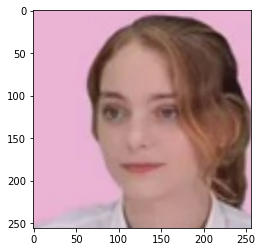

{'emotion': {'angry': 0.004061825154617022, 'disgust': 0.00010859419325413704, 'fear': 0.2064692430773126, 'happy': 0.21023410667667314, 'sad': 0.24651508664771424, 'surprise': 0.03792967861095094, 'neutral': 0.294681465639478}, 'age': 30.4875, 'gender': 'female', 'race': {'asian': 0.10541191519732661, 'indian': 0.01756166739256781, 'black': 0.0017709896883807822, 'white': 0.5666781469204882, 'middle eastern': 0.19085033125565484, 'latino hispanic': 0.1177269495455817}, 'race_d': 'white', 'reaction score': 7.089293243419367}


In [16]:
img_path = os.path.join(sort_dir, "10", "20_02.jpg")

%matplotlib inline
pil_im = Image.open(img_path)
plt.imshow(np.asarray(pil_im))
plt.show()
print(indivisual_result["10"])

In [17]:
plot_dir = os.path.join(result_dir, "figures")
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

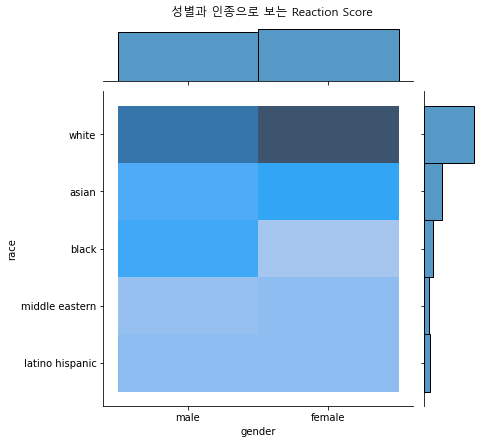

In [18]:
reaction_scores = pd.DataFrame(data={"gender":[dict["gender"] for dict in indivisual_result.values()], "race":[dict["race_d"] for dict in indivisual_result.values()], "reaction score":[dict["reaction score"] for dict in indivisual_result.values()], "age":[dict["age"] for dict in indivisual_result.values()]})
sns.jointplot(data=reaction_scores, x="gender", y="race", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("성별과 인종으로 보는 Reaction Score", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별과 인종으로 보는 Reaction Score.png"), dpi=300)

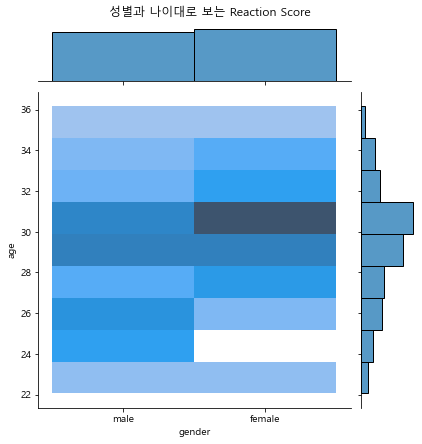

In [19]:
sns.jointplot(data=reaction_scores, x="gender", y="age", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("성별과 나이대로 보는 Reaction Score", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별과 나이대로 보는 Reaction Score.png"), dpi=300)

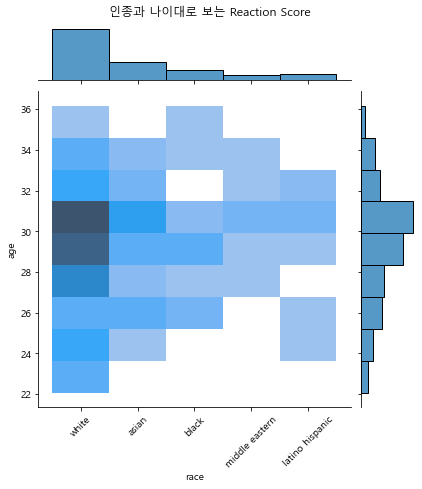

In [20]:
g = sns.jointplot(data=reaction_scores, x="race", y="age", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("인종과 나이대로 보는 Reaction Score", y=1.02)
plt.setp(g.ax_joint.get_xticklabels(), rotation=45)
plt.savefig(os.path.join(plot_dir, "인종과 나이대로 보는 Reaction Score.png"), dpi=300)

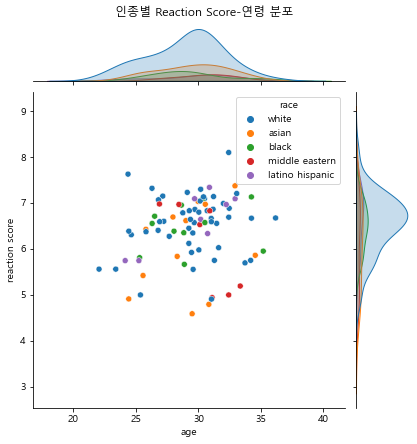

In [21]:
g = sns.jointplot(data=reaction_scores, x="age", y="reaction score", hue="race", kind="scatter")
plt.suptitle("인종별 Reaction Score-연령 분포", y=1.02)
plt.savefig(os.path.join(plot_dir, "인종별 Reaction Score-연령 분포.png"), dpi=300)

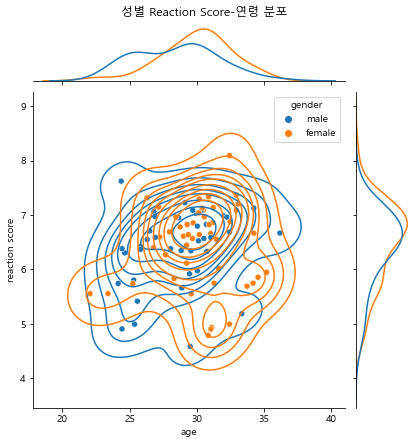

In [22]:
g = sns.jointplot(data=reaction_scores, x="age", y="reaction score", hue="gender", kind="kde")
g.plot_joint(sns.scatterplot)
plt.suptitle("성별 Reaction Score-연령 분포", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별 Reaction Score-연령 분포.png"), dpi=300)